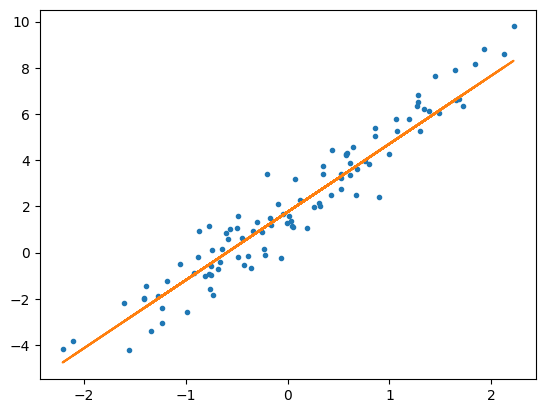

In [4]:
from myutils.nnutils import *
#删除runs目录下的所有文件和目录            
delete_directory_contents("./runs/")   
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import torch as t
import matplotlib.pyplot as plot
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
import numpy as np
#########例子演示梯度下降损失（每个epoch的损失）
#其中的 log_dir 表示保存日志的路径，默认会保存在“runs/ 当前时间 _ 主机名”文件夹中。
writer=SummaryWriter(log_dir=None)
t.manual_seed(42)
# 使用自动梯度实现线性回归
x=t.randn(100,1)
x_test=t.randn(20,1)
y=3*x+2+t.randn(100,1) #实际值上加上一些随机噪点
y_test=3*x+2+t.randn(100,1)

class LinearModel(nn.Module):
    def __init__(self):
        nn.Module.__init__(self)
        self.w=nn.Parameter(t.randn(1,1))
        self.b=nn.Parameter(t.randn(1))
    def forward(self,x):
        return t.mm(x,self.w)+self.b
model=LinearModel()
writer.add_graph(model,model.w)
lossf=nn.MSELoss()
#定义优化器,第一个参数为模型的参数，参数传入后,自动获取他的梯度并且-梯度*学习率
optim=t.optim.SGD(model.parameters(),lr=0.01)
#训练100次，100次梯度下降，计算到最小损失时的w和b
epochCount=120
for epoch in range(epochCount):
    # 记录参数直方图
    for name, param in model.named_parameters():
        writer.add_histogram(name, param, epoch+1)
    y_pre=model(x)
    #注意梯度清零，否则会累加
    optim.zero_grad()  
    loss=lossf(y_pre,y)
    writer.add_scalar("Loss/train",loss,epoch)
    loss.backward()
    #更新参数w和b
    optim.step()

plot.plot(x,y,'.')
plot.plot(x.data.numpy(),y_pre.data.numpy())
plot.show()
writer.close()

